In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv


In [2]:
import re

In [3]:
df = pd.read_csv('/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [5]:
# keep only the required columns
text_df = df[['post_text']]
text_df.head()

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [6]:
text_df.loc[:, "post_text"] = text_df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
text_df.loc[:, "post_text"] = text_df["post_text"].str.replace("\d", "", regex=True)

# Remove punctuation from tweets
text_df.loc[:, "post_text"] = text_df["post_text"].str.replace("[^\w\s]", "", regex=True)


text_df.head()

,post_text
0,its just over years since i was diagnosed wit...
1,its sunday i need a break so im planning to sp...
2,awake but tired i need to sleep but my brain h...
3,rt sewhq retro bears make perfect gifts and ar...
4,its hard to say whether packing lists are maki...


In [7]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.


In [8]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk

In [9]:
nltk.download("stopwords")
sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
text_df.loc[:, "post_text"] = text_df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [11]:
text_df.head()

,post_text
0,years since diagnosed anxiety depression today...
1,sunday need break im planning spend little tim...
2,awake tired need sleep brain ideas
3,rt sewhq retro bears make perfect gifts great ...
4,hard say whether packing lists making life eas...


In [12]:
from textblob import Word

nltk.download("wordnet")
nltk.download("omw-1.4")

text_df.loc[:, "post_text"]  = text_df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [13]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /usr/share/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
from nltk.tokenize import word_tokenize

# tokenize each word
nltk.download('punkt')
text_df.loc[:, "post_text"] = text_df["post_text"].apply(lambda x: TextBlob(x).words)

text_df.head()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,post_text
0,"[years, since, diagnosed, anxiety, depression,..."
1,"[sunday, need, break, im, planning, spend, lit..."
2,"[awake, tired, need, sleep, brain, ideas]"
3,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,"[hard, say, whether, packing, lists, making, l..."


In [17]:
from tqdm import tqdm

In [18]:
blob_emptylist = []

for i in tqdm(df["post_text"]):
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

100%|██████████| 20000/20000 [00:05<00:00, 3554.99it/s]


In [19]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.262500,0.537500
3,1.000000,0.875000
4,-0.045833,0.370833


In [20]:
# Combine both df and df2
df3 = pd.concat([text_df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,polarity,subjectivity
0,"[years, since, diagnosed, anxiety, depression,...",0.100000,1.000000
1,"[sunday, need, break, im, planning, spend, lit...",-0.093750,0.750000
2,"[awake, tired, need, sleep, brain, ideas]",-0.262500,0.537500
3,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,0.875000
4,"[hard, say, whether, packing, lists, making, l...",-0.045833,0.370833


In [21]:
df3['post_text_joined'] = df3['post_text'].apply(lambda x: ' '.join([w for w in x]))

In [22]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','post_text_joined','polarity']]
df4.head(6)

,post_text,post_text_joined,polarity
0,"[years, since, diagnosed, anxiety, depression,...",years since diagnosed anxiety depression today...,0.100000
1,"[sunday, need, break, im, planning, spend, lit...",sunday need break im planning spend little tim...,-0.093750
2,"[awake, tired, need, sleep, brain, ideas]",awake tired need sleep brain ideas,-0.262500
3,"[rt, sewhq, retro, bears, make, perfect, gifts...",rt sewhq retro bears make perfect gifts great ...,1.000000
4,"[hard, say, whether, packing, lists, making, l...",hard say whether packing lists making life eas...,-0.045833
5,"[making, packing, lists, new, hobby, movinghouse]",making packing lists new hobby movinghouse,0.136364


In [23]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,post_text_joined,polarity,Sentiment
0,"[years, since, diagnosed, anxiety, depression,...",years since diagnosed anxiety depression today...,0.100000,Positive
1,"[sunday, need, break, im, planning, spend, lit...",sunday need break im planning spend little tim...,-0.093750,Negative
2,"[awake, tired, need, sleep, brain, ideas]",awake tired need sleep brain ideas,-0.262500,Negative
3,"[rt, sewhq, retro, bears, make, perfect, gifts...",rt sewhq retro bears make perfect gifts great ...,1.000000,Positive
4,"[hard, say, whether, packing, lists, making, l...",hard say whether packing lists making life eas...,-0.045833,Negative


# Aug

In [24]:
!pip install nlpaug
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 3.3 MB/s eta 0:00:00a 0:00:01m


In [25]:
import nlpaug.augmenter.word as naw

In [26]:
aug = naw.SynonymAug(aug_src='wordnet', aug_max=3)  # aug_max controls how many words are augmented

In [27]:
negative_samples = df4[df4['Sentiment'] == 'Negative']

In [28]:
negative_samples.head()

,post_text,post_text_joined,polarity,Sentiment
1,"[sunday, need, break, im, planning, spend, lit...",sunday need break im planning spend little tim...,-0.093750,Negative
2,"[awake, tired, need, sleep, brain, ideas]",awake tired need sleep brain ideas,-0.262500,Negative
4,"[hard, say, whether, packing, lists, making, l...",hard say whether packing lists making life eas...,-0.045833,Negative
6,"[point, keeping, stuff, nostalgic, reasons, cr...",point keeping stuff nostalgic reasons cross li...,-0.153571,Negative
8,"[cant, bothered, cook, take, away, way, lazy]",cant bothered cook take away way lazy,-0.250000,Negative


In [29]:
n_augmentations = 16000 - 3000

In [30]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [31]:
augmented_texts = []
for i in tqdm(range(n_augmentations)):
    original_text = negative_samples['post_text_joined'].sample().values[0]  # Randomly pick a negative sample
    augmented_text = aug.augment(original_text)  # Augment the text
#     print(f"main text: {original_text} & aug text: {augmented_text}")
#     break
    augmented_texts.append(augmented_text[0])

100%|██████████| 13000/13000 [00:20<00:00, 647.45it/s]


In [32]:
augmented_df = pd.DataFrame({'Sentiment': 'Negative', 'post_text_joined': augmented_texts})

# Append the augmented samples to the original DataFrame
balanced_df = pd.concat([df4, augmented_df], ignore_index=True)
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_text         20000 non-null  object 
 1   post_text_joined  33000 non-null  object 
 2   polarity          20000 non-null  float64
 3   Sentiment         33000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.0+ MB


In [33]:
print(balanced_df['Sentiment'].value_counts())

Sentiment
Negative    16574
Positive    16426
Name: count, dtype: int64


In [34]:
balanced_df.head()

,post_text,post_text_joined,polarity,Sentiment
0,"[years, since, diagnosed, anxiety, depression,...",years since diagnosed anxiety depression today...,0.100000,Positive
1,"[sunday, need, break, im, planning, spend, lit...",sunday need break im planning spend little tim...,-0.093750,Negative
2,"[awake, tired, need, sleep, brain, ideas]",awake tired need sleep brain ideas,-0.262500,Negative
3,"[rt, sewhq, retro, bears, make, perfect, gifts...",rt sewhq retro bears make perfect gifts great ...,1.000000,Positive
4,"[hard, say, whether, packing, lists, making, l...",hard say whether packing lists making life eas...,-0.045833,Negative


In [35]:
balanced_df = balanced_df.drop('post_text', axis=1)

In [36]:
balanced_df.head()

,post_text_joined,polarity,Sentiment
0,years since diagnosed anxiety depression today...,0.100000,Positive
1,sunday need break im planning spend little tim...,-0.093750,Negative
2,awake tired need sleep brain ideas,-0.262500,Negative
3,rt sewhq retro bears make perfect gifts great ...,1.000000,Positive
4,hard say whether packing lists making life eas...,-0.045833,Negative


In [37]:
balanced_df = balanced_df.drop('polarity', axis=1)

In [40]:
balanced_df['Sentiment'] = balanced_df['Sentiment'].replace("Positive", 1)
balanced_df['Sentiment'] = balanced_df['Sentiment'].replace("Negative", 0)

/tmp/ipykernel_36/1872330670.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  balanced_df['Sentiment'] = balanced_df['Sentiment'].replace("Negative", 0)


In [41]:
balanced_df['Sentiment'].unique()

array([1, 0])

In [38]:
!pip install -q transformers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [39]:
import seaborn as sns

from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle


import plotly.express as px
import plotly.graph_objects as go

import os
import re
import json
import copy
import collections

In [47]:
train_valid_data, test_data = train_test_split(balanced_df, train_size=0.8, shuffle=True, random_state=42,
                                               stratify=balanced_df['Sentiment'])

train_data, valid_data = train_test_split(train_valid_data, train_size=0.8, shuffle=True, random_state=42,
                                          stratify=train_valid_data['Sentiment'])

In [48]:
print('{:>5,} Training samples'.format(len(train_data)))
print('{:>5,} Test samples'.format(len(test_data)))
print('{:>5,} Validation samples'.format(len(valid_data)))

21,120 Training samples
6,600 Test samples
5,280 Validation samples


In [49]:
train = train_data.reset_index(drop=True)
valid = valid_data.reset_index(drop=True)
test = test_data.reset_index(drop=True)

x_train, y_train = train['post_text_joined'].values.tolist(), train['Sentiment'].values.tolist()
x_valid, y_valid = valid['post_text_joined'].values.tolist(), valid['Sentiment'].values.tolist()
x_test, y_test = test['post_text_joined'].values.tolist(), test['Sentiment'].values.tolist()

print(train.shape)
print(valid.shape)
print(test.shape)

(21120, 2)
(5280, 2)
(6600, 2)


In [51]:
!pip install datasets

In [52]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import os.path
from os import path
from datasets import Dataset
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset, DatasetDict

# BERT Base Uncase

In [53]:
tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",
                                                           num_labels=2, 
                                                           ignore_mismatched_sizes=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [67]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   post_text_joined  33000 non-null  object
 1   Sentiment         33000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 515.8+ KB


In [69]:
import matplotlib.pyplot as plt

/tmp/ipykernel_36/3996359946.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_df['WordLength'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


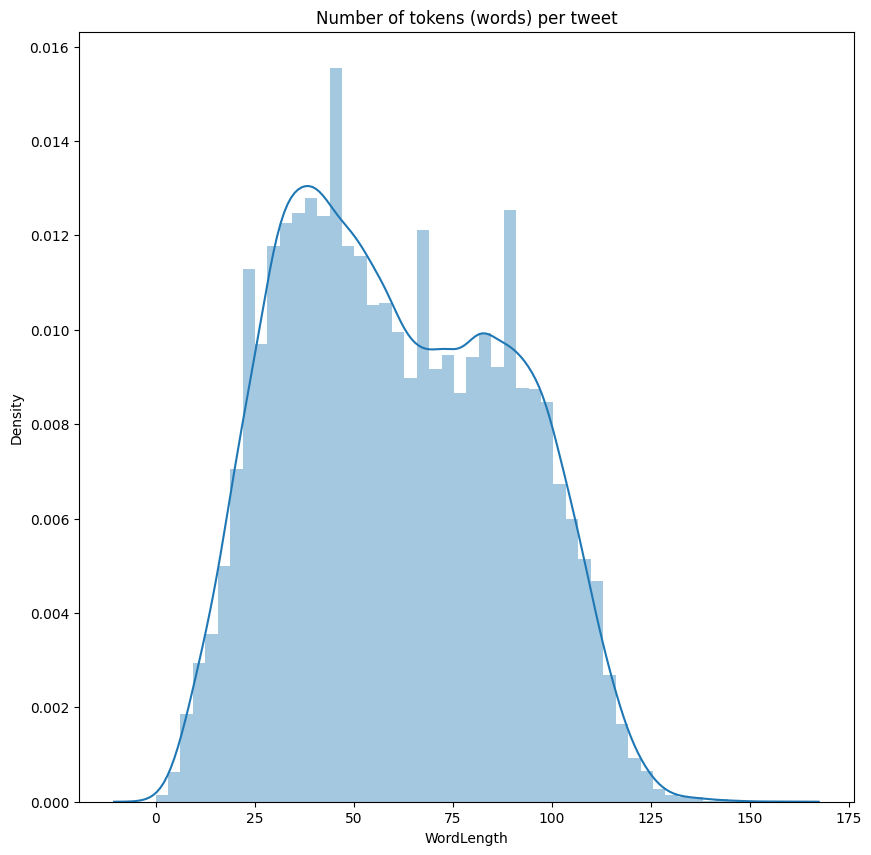

In [70]:
balanced_df['WordLength'] = balanced_df['post_text_joined'].str.len()
fig = plt.figure(figsize=(10,10))
sns.distplot(balanced_df['WordLength'])
plt.title('Number of tokens (words) per tweet')
plt.show()

In [110]:
# Set parameters
MAX_LENGTH = 175

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./output/bbun-tuned-v3",
    report_to=None,
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    evaluation_strategy="steps",
    save_total_limit = 1,
    logging_strategy="epoch",
    load_best_model_at_end=True,
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [92]:
train_encodings = tokenizer(x_train, truncation=True, padding="max_length", max_length=MAX_LENGTH)
valid_encodings = tokenizer(x_valid, truncation=True, padding="max_length", max_length=MAX_LENGTH)
test_encodings = tokenizer(x_test, truncation=True, padding="max_length", max_length=MAX_LENGTH)

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [93]:
# Convert to torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [94]:
train_dataset = Dataset(train_encodings, y_train)
valid_dataset = Dataset(valid_encodings, y_valid)
test_dataset = Dataset(test_encodings, y_test)

In [109]:
import wandb

In [108]:
!wandb offline
!wandb disabled

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


W&B offline. Running your script from this directory will only write metadata locally. Use wandb disabled to completely turn off W&B.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


W&B disabled.


In [87]:
!pip uninstall -y wandb

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
!pip install wandb==0.17.5

In [111]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [112]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

In [113]:
from unittest import mock
from unittest.mock import Mock
class Dummy:
    def __enter__(self):
        return Mock()

    def __exit__(self, *args):
        pass

with mock.patch('wandb.init', return_value=Dummy()):
    trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss
500,No log,0.729158
1000,No log,0.273328
1500,0.193000,0.413114
2000,0.193000,0.345708
2500,0.193000,0.317683
3000,0.108100,0.389463
3500,0.108100,0.362282
4000,0.056000,0.376571
4500,0.056000,0.453564
5000,0.056000,0.415772


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

In [114]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [115]:
trainer.evaluate()

predicted = trainer.predict(test_dataset)
predictions = predicted.predictions

predicted_classes = predictions.argmax(-1)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [116]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predicted_classes, average=None)
accuracy = accuracy_score(y_test, predicted_classes)

for i in range(len(set(y_train))):
    print(f"Class {i}: Precision: {precision[i]}, Recall: {recall[i]}, F1: {f1[i]}")

print(f"Overall accuracy: {accuracy}")

Class 0: Precision: 0.8816013628620102, Recall: 0.9366515837104072, F1: 0.9082931110136023
Class 1: Precision: 0.9317738791423001, Recall: 0.8730593607305936, F1: 0.9014615747289014
Overall accuracy: 0.905


In [117]:
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)  # Adjust if your model outputs probabilities
true_labels = predictions.label_ids

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [119]:
from sklearn.metrics import roc_curve, auc

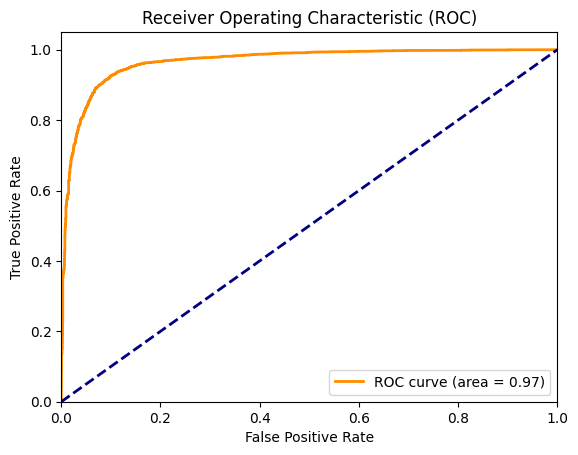

In [120]:
pred_probs = predictions.predictions
# If you have multiple classes, you need to compute the ROC AUC for each class
# For binary classification, consider only one class (usually positive class)

# Assuming binary classification with class 1 as positive class
fpr, tpr, _ = roc_curve(true_labels, pred_probs[:, 1], pos_label=1)  # Adjust if your model outputs probabilities for each class
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

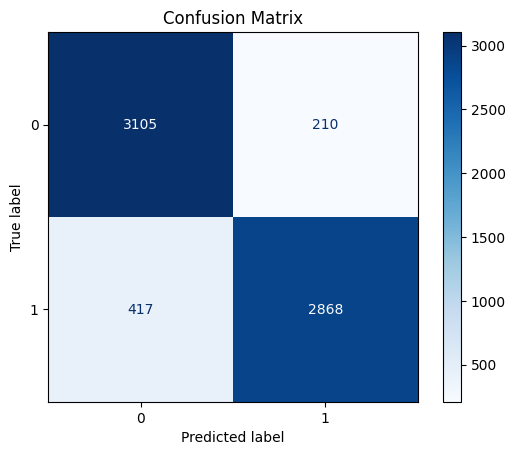

In [123]:
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# BerTweet Base Sentiment

https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis

In [124]:
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis",
                                                           num_labels=2, 
                                                           ignore_mismatched_sizes=True)

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [125]:
# Set parameters
MAX_LENGTH = 175

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./output/btbs-tuned-v1",
    report_to=None,
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    evaluation_strategy="steps",
    save_total_limit = 1,
    logging_strategy="epoch",
    load_best_model_at_end=True,
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [126]:
train_encodings = tokenizer(x_train, truncation=True, padding="max_length", max_length=MAX_LENGTH)
valid_encodings = tokenizer(x_valid, truncation=True, padding="max_length", max_length=MAX_LENGTH)
test_encodings = tokenizer(x_test, truncation=True, padding="max_length", max_length=MAX_LENGTH)

In [127]:
train_dataset = Dataset(train_encodings, y_train)
valid_dataset = Dataset(valid_encodings, y_valid)
test_dataset = Dataset(test_encodings, y_test)

In [128]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

In [129]:
with mock.patch('wandb.init', return_value=Dummy()):
    trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss
500,No log,0.369390
1000,No log,0.342697
1500,0.379400,0.364765
2000,0.379400,0.304919
2500,0.379400,0.284544
3000,0.206300,0.375312
3500,0.206300,0.343192
4000,0.127100,0.361903
4500,0.127100,0.358889
5000,0.127100,0.382371


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

In [130]:
trainer.evaluate()

predictions = trainer.predict(test_dataset).predictions

predicted_classes = predictions.argmax(-1)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predicted_classes, average=None)
accuracy = accuracy_score(y_test, predicted_classes)

for i in range(len(set(y_train))):
    print(f"Class {i}: Precision: {precision[i]}, Recall: {recall[i]}, F1: {f1[i]}")

print(f"Overall accuracy: {accuracy}")

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Class 0: Precision: 0.9204920492049204, Recall: 0.9254901960784314, F1: 0.9229843561973525
Class 1: Precision: 0.9243954698500153, Recall: 0.9193302891933028, F1: 0.9218559218559219
Overall accuracy: 0.9224242424242424


In [131]:
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)  # Adjust if your model outputs probabilities
true_labels = predictions.label_ids

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


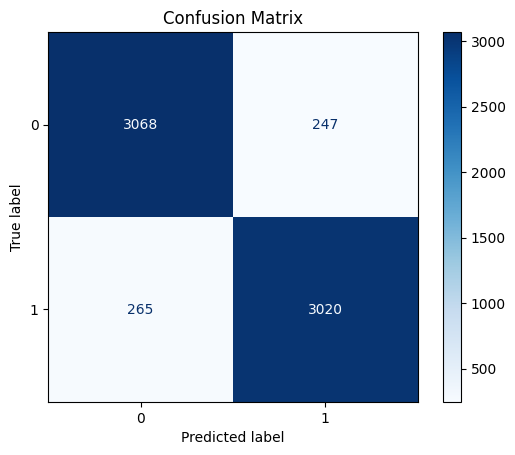

In [132]:
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

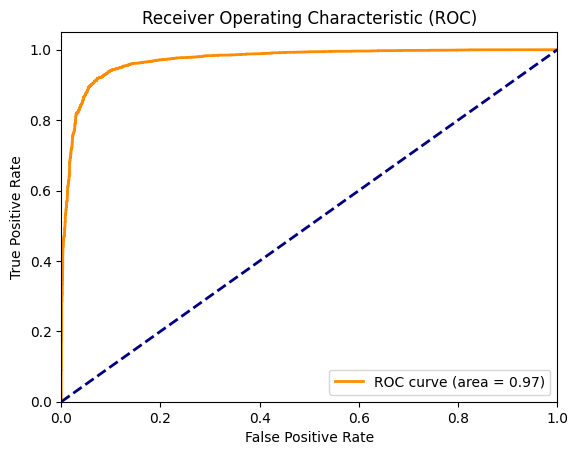

In [133]:
pred_probs = predictions.predictions
# If you have multiple classes, you need to compute the ROC AUC for each class
# For binary classification, consider only one class (usually positive class)

# Assuming binary classification with class 1 as positive class
fpr, tpr, _ = roc_curve(true_labels, pred_probs[:, 1], pos_label=1)  # Adjust if your model outputs probabilities for each class
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# BERT Base Uncased Emotion

https://huggingface.co/nateraw/bert-base-uncased-emotion

In [134]:
tokenizer = AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion")
model = AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion")

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [135]:
# Set parameters
MAX_LENGTH = 175

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./output/bbue-tuned-v1",
    report_to=None,
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    evaluation_strategy="steps",
    save_total_limit = 1,
    logging_strategy="epoch",
    load_best_model_at_end=True,
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [137]:
train_encodings = tokenizer(x_train, truncation=True, padding="max_length", max_length=MAX_LENGTH)
valid_encodings = tokenizer(x_valid, truncation=True, padding="max_length", max_length=MAX_LENGTH)
test_encodings = tokenizer(x_test, truncation=True, padding="max_length", max_length=MAX_LENGTH)

In [138]:
train_dataset = Dataset(train_encodings, y_train)
valid_dataset = Dataset(valid_encodings, y_valid)
test_dataset = Dataset(test_encodings, y_test)

In [139]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

In [140]:
with mock.patch('wandb.init', return_value=Dummy()):
    trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss
500,No log,0.332852
1000,No log,0.309448
1500,0.380600,0.330828
2000,0.380600,0.323805
2500,0.380600,0.307645
3000,0.178000,0.388732
3500,0.178000,0.368417
4000,0.088200,0.440212
4500,0.088200,0.369819
5000,0.088200,0.415779


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

In [141]:
trainer.evaluate()

predicted = trainer.predict(test_dataset)
predictions = predicted.predictions

predicted_classes = predictions.argmax(-1)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predicted_classes, average=None)
accuracy = accuracy_score(y_test, predicted_classes)

for i in range(len(set(y_train))):
    print(f"Class {i}: Precision: {precision[i]}, Recall: {recall[i]}, F1: {f1[i]}")

print(f"Overall accuracy: {accuracy}")

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Class 0: Precision: 0.9382985353692739, Recall: 0.9082956259426848, F1: 0.9230533415082771
Class 1: Precision: 0.9108881676010623, Recall: 0.9397260273972603, F1: 0.9250824093497153
Overall accuracy: 0.923939393939394


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)  # Adjust if your model outputs probabilities
true_labels = predictions.label_ids

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


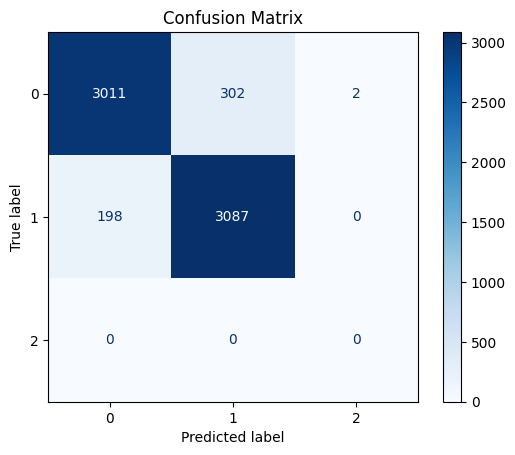

In [143]:
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

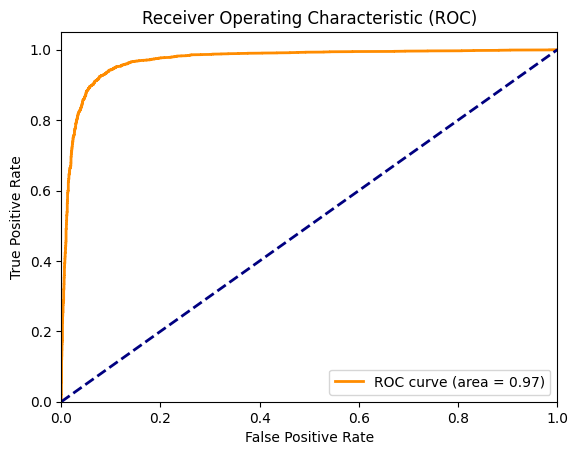

In [144]:
pred_probs = predictions.predictions
# If you have multiple classes, you need to compute the ROC AUC for each class
# For binary classification, consider only one class (usually positive class)

# Assuming binary classification with class 1 as positive class
fpr, tpr, _ = roc_curve(true_labels, pred_probs[:, 1], pos_label=1)  # Adjust if your model outputs probabilities for each class
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# DistilBERT Base Uncase Emotion

In [145]:
tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
model = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion",
                                                           num_labels=2, 
                                                           ignore_mismatched_sizes=True)

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([6]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([6, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [146]:
MAX_LENGTH = 175

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./output/dbbue-tuned-v1",
    report_to=None,
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    evaluation_strategy="steps",
    save_total_limit = 1,
    logging_strategy="epoch",
    load_best_model_at_end=True,
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [147]:
train_encodings = tokenizer(x_train, truncation=True, padding="max_length", max_length=MAX_LENGTH)
valid_encodings = tokenizer(x_valid, truncation=True, padding="max_length", max_length=MAX_LENGTH)
test_encodings = tokenizer(x_test, truncation=True, padding="max_length", max_length=MAX_LENGTH)

In [148]:
train_dataset = Dataset(train_encodings, y_train)
valid_dataset = Dataset(valid_encodings, y_valid)
test_dataset = Dataset(test_encodings, y_test)

In [149]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

In [150]:
with mock.patch('wandb.init', return_value=Dummy()):
    trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss
500,No log,0.368991
1000,No log,0.318598
1500,0.387500,0.361151
2000,0.387500,0.311673
2500,0.387500,0.287440
3000,0.199100,0.362861
3500,0.199100,0.369179
4000,0.105300,0.373564
4500,0.105300,0.381174
5000,0.105300,0.395889


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

In [151]:
trainer.evaluate()

predicted = trainer.predict(test_dataset)
predictions = predicted.predictions

predicted_classes = predictions.argmax(-1)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [152]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predicted_classes, average=None)
accuracy = accuracy_score(y_test, predicted_classes)

for i in range(len(set(y_train))):
    print(f"Class {i}: Precision: {precision[i]}, Recall: {recall[i]}, F1: {f1[i]}")

print(f"Overall accuracy: {accuracy}")

Class 0: Precision: 0.9113961813842482, Recall: 0.9215686274509803, F1: 0.9164541772911353
Class 1: Precision: 0.9199507389162561, Recall: 0.9095890410958904, F1: 0.9147405479871422
Overall accuracy: 0.9156060606060606


In [153]:
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)  # Adjust if your model outputs probabilities
true_labels = predictions.label_ids

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


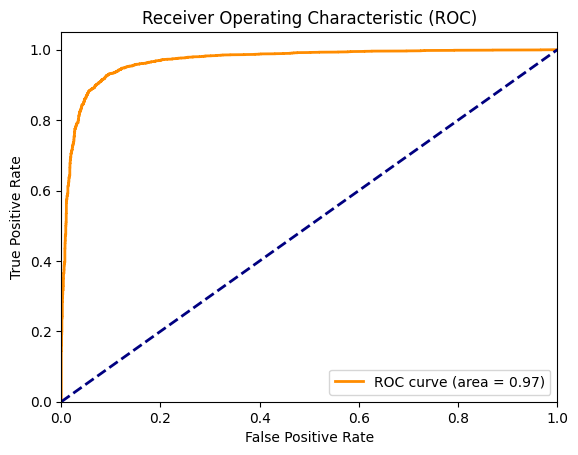

In [154]:
pred_probs = predictions.predictions
# If you have multiple classes, you need to compute the ROC AUC for each class
# For binary classification, consider only one class (usually positive class)

# Assuming binary classification with class 1 as positive class
fpr, tpr, _ = roc_curve(true_labels, pred_probs[:, 1], pos_label=1)  # Adjust if your model outputs probabilities for each class
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()